### Spatial data analysis in Python

#### Data loading... 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [7]:
df = pd.read_csv('circle_plot.csv', sep=';')

#### Data description... 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Plot     131 non-null    int64  
 1   N        131 non-null    int64  
 2   Species  131 non-null    object 
 3   x        131 non-null    float64
 4   y        131 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.2+ KB


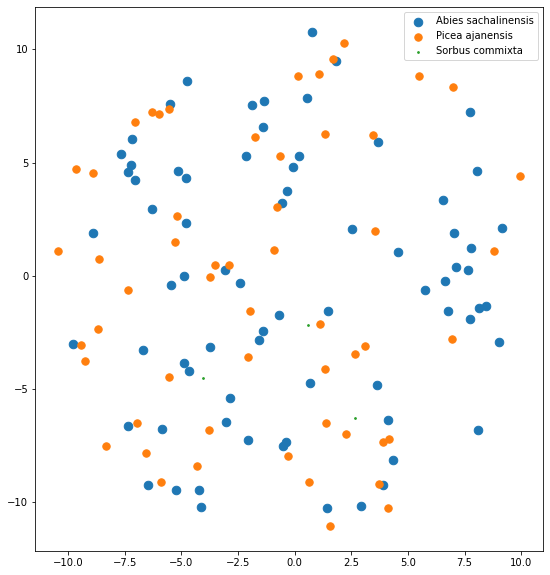

In [14]:
plt.figure(figsize=(10, 10))
for k, v in df.Species.value_counts().to_dict().items():
    dp = df[df.Species == k]
    plt.scatter(dp.x, dp.y, v, label=k)
plt.legend()
plt.gca().set_aspect('equal', 'box')

#### Use RANSAC for  finding the best linear regression fit

In [15]:
 df.Species.value_counts().to_dict()

{'Abies sachalinensis': 73, 'Picea ajanensis': 55, 'Sorbus commixta': 3}

(73, 1)
The number of inlier points: 14
The number of outlier points: 59


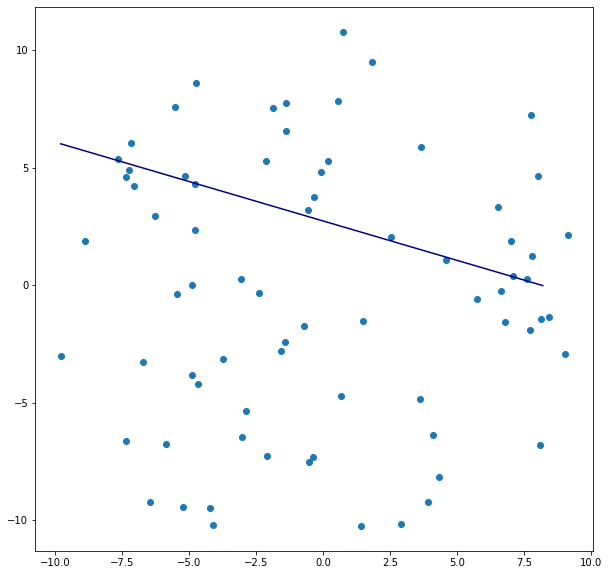

(55, 1)
The number of inlier points: 11
The number of outlier points: 44


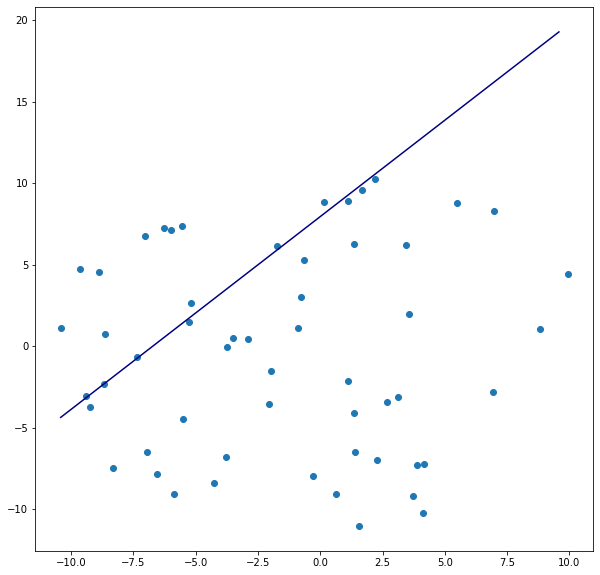

(3, 1)
The number of inlier points: 2
The number of outlier points: 1


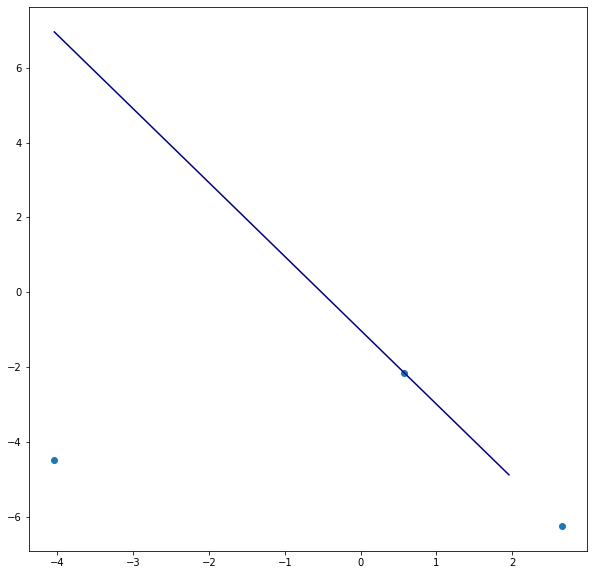

In [29]:
for sp_name in df.Species.unique():
    plt.figure(figsize=(10, 10))
    x = df.x[df.Species == sp_name].values[:, np.newaxis]
    y = df.y[df.Species == sp_name].values[:, np.newaxis]
    print(x.shape)
    ransac = linear_model.RANSACRegressor(residual_threshold=1)
    ransac.fit(x, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    print(f"The number of inlier points: {inlier_mask.sum()}")
    print(f"The number of outlier points: {outlier_mask.sum()}")
    
    line_x = np.arange(x.min(), x.max())[:, np.newaxis]
    line_y_ransac = ransac.predict(line_x)
    plt.plot(x, y, 'o')
    plt.gca().plot(line_x, line_y_ransac, color="navy",  label="Linear regressor")
    plt.show()